In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load your time series data
# Assuming you have a DataFrame with 'timestamp', 'temperature', and 'humidity' columns
df = pd.read_csv('timestream_data.csv')




In [2]:
df

,sensor_data,time,measure_name,measure_value
0,senor_1,2024-03-29 19:05:08.429000000,temperature,24.500000
1,senor_1,2024-03-29 19:05:08.429000000,humidity,80.000000
2,senor_1,2024-03-29 19:05:07.398000000,temperature,24.500000
3,senor_1,2024-03-29 19:05:07.398000000,humidity,80.000000
4,senor_1,2024-03-29 19:05:06.360000000,temperature,24.400000
...,...,...,...,...
2258,senor_1,2024-03-29 18:26:47.888000000,humidity,35.000000
2259,senor_1,2024-03-29 18:26:46.811000000,temperature,25.400000
2260,senor_1,2024-03-29 18:26:46.811000000,humidity,35.000000
2261,senor_1,2024-03-29 18:26:45.788000000,temperature,25.299999


In [3]:
df = df.pivot(index='time', columns='measure_name', values='measure_value').reset_index()

In [4]:
df

measure_name,time,humidity,temperature
0,2024-03-29 18:26:45.788000000,35.0,25.299999
1,2024-03-29 18:26:46.811000000,35.0,25.400000
2,2024-03-29 18:26:47.888000000,35.0,25.400000
3,2024-03-29 18:26:48.846000000,35.0,25.400000
4,2024-03-29 18:26:49.857000000,35.0,25.400000
...,...,...,...
1191,2024-03-29 19:05:04.371000000,80.0,24.299999
1192,2024-03-29 19:05:05.371000000,80.0,24.400000
1193,2024-03-29 19:05:06.360000000,80.0,24.400000
1194,2024-03-29 19:05:07.398000000,80.0,24.500000


In [5]:
df['Hum_lag'] = df['humidity'].shift(1)
df['Temp_lag'] = df['temperature'].shift(1)
df

measure_name,time,humidity,temperature,Hum_lag,Temp_lag
0,2024-03-29 18:26:45.788000000,35.0,25.299999,NaN,NaN
1,2024-03-29 18:26:46.811000000,35.0,25.400000,35.0,25.299999
2,2024-03-29 18:26:47.888000000,35.0,25.400000,35.0,25.400000
3,2024-03-29 18:26:48.846000000,35.0,25.400000,35.0,25.400000
4,2024-03-29 18:26:49.857000000,35.0,25.400000,35.0,25.400000
...,...,...,...,...,...
1191,2024-03-29 19:05:04.371000000,80.0,24.299999,80.0,24.299999
1192,2024-03-29 19:05:05.371000000,80.0,24.400000,80.0,24.299999
1193,2024-03-29 19:05:06.360000000,80.0,24.400000,80.0,24.400000
1194,2024-03-29 19:05:07.398000000,80.0,24.500000,80.0,24.400000


In [6]:
df['Time'] = np.arange(len(df.index))
df

measure_name,time,humidity,temperature,Hum_lag,Temp_lag,Time
0,2024-03-29 18:26:45.788000000,35.0,25.299999,NaN,NaN,0
1,2024-03-29 18:26:46.811000000,35.0,25.400000,35.0,25.299999,1
2,2024-03-29 18:26:47.888000000,35.0,25.400000,35.0,25.400000,2
3,2024-03-29 18:26:48.846000000,35.0,25.400000,35.0,25.400000,3
4,2024-03-29 18:26:49.857000000,35.0,25.400000,35.0,25.400000,4
...,...,...,...,...,...,...
1191,2024-03-29 19:05:04.371000000,80.0,24.299999,80.0,24.299999,1191
1192,2024-03-29 19:05:05.371000000,80.0,24.400000,80.0,24.299999,1192
1193,2024-03-29 19:05:06.360000000,80.0,24.400000,80.0,24.400000,1193
1194,2024-03-29 19:05:07.398000000,80.0,24.500000,80.0,24.400000,1194


In [7]:
df['time'] = pd.to_datetime(df['time'])
df = df.reset_index()
df.set_index('time', inplace = True)


In [8]:
df.drop('index', inplace = True, axis = 1)

In [9]:
df

measure_name,humidity,temperature,Hum_lag,Temp_lag,Time
time,,,,,
2024-03-29 18:26:45.788,35.0,25.299999,NaN,NaN,0
2024-03-29 18:26:46.811,35.0,25.400000,35.0,25.299999,1
2024-03-29 18:26:47.888,35.0,25.400000,35.0,25.400000,2
2024-03-29 18:26:48.846,35.0,25.400000,35.0,25.400000,3
2024-03-29 18:26:49.857,35.0,25.400000,35.0,25.400000,4
...,...,...,...,...,...
2024-03-29 19:05:04.371,80.0,24.299999,80.0,24.299999,1191
2024-03-29 19:05:05.371,80.0,24.400000,80.0,24.299999,1192
2024-03-29 19:05:06.360,80.0,24.400000,80.0,24.400000,1193


In [10]:
df.dropna(inplace = True)

In [11]:
df

measure_name,humidity,temperature,Hum_lag,Temp_lag,Time
time,,,,,
2024-03-29 18:26:46.811,35.0,25.400000,35.0,25.299999,1
2024-03-29 18:26:47.888,35.0,25.400000,35.0,25.400000,2
2024-03-29 18:26:48.846,35.0,25.400000,35.0,25.400000,3
2024-03-29 18:26:49.857,35.0,25.400000,35.0,25.400000,4
2024-03-29 18:26:50.892,35.0,25.500000,35.0,25.400000,5
...,...,...,...,...,...
2024-03-29 19:05:04.371,80.0,24.299999,80.0,24.299999,1191
2024-03-29 19:05:05.371,80.0,24.400000,80.0,24.299999,1192
2024-03-29 19:05:06.360,80.0,24.400000,80.0,24.400000,1193


In [12]:
hum_series = df[['humidity', 'Hum_lag', "Time"]]
hum_series

measure_name,humidity,Hum_lag,Time
time,,,
2024-03-29 18:26:46.811,35.0,35.0,1
2024-03-29 18:26:47.888,35.0,35.0,2
2024-03-29 18:26:48.846,35.0,35.0,3
2024-03-29 18:26:49.857,35.0,35.0,4
2024-03-29 18:26:50.892,35.0,35.0,5
...,...,...,...
2024-03-29 19:05:04.371,80.0,80.0,1191
2024-03-29 19:05:05.371,80.0,80.0,1192
2024-03-29 19:05:06.360,80.0,80.0,1193


In [13]:
temp_series = df[['temperature', 'Temp_lag', "Time"]]
temp_series

measure_name,temperature,Temp_lag,Time
time,,,
2024-03-29 18:26:46.811,25.400000,25.299999,1
2024-03-29 18:26:47.888,25.400000,25.400000,2
2024-03-29 18:26:48.846,25.400000,25.400000,3
2024-03-29 18:26:49.857,25.400000,25.400000,4
2024-03-29 18:26:50.892,25.500000,25.400000,5
...,...,...,...
2024-03-29 19:05:04.371,24.299999,24.299999,1191
2024-03-29 19:05:05.371,24.400000,24.299999,1192
2024-03-29 19:05:06.360,24.400000,24.400000,1193


In [14]:
X = df.loc[:, ['Temp_lag']]
X.dropna(inplace=True)
y = df.loc[:, 'temperature']
y, X = y.align(X, join='inner')

In [15]:
ts_model = LinearRegression()
ts_model.fit(X,y)

LinearRegression()

In [16]:
y_pred = pd.Series(ts_model.predict(X), index=X.index)

In [17]:
y_pred

time
2024-03-29 18:26:46.811    25.329593
2024-03-29 18:26:47.888    25.429798
2024-03-29 18:26:48.846    25.429798
2024-03-29 18:26:49.857    25.429798
2024-03-29 18:26:50.892    25.429798
                             ...    
2024-03-29 19:05:04.371    24.327538
2024-03-29 19:05:05.371    24.327538
2024-03-29 19:05:06.360    24.427744
2024-03-29 19:05:07.398    24.427744
2024-03-29 19:05:08.429    24.527950
Length: 1022, dtype: float64

In [18]:
X_hum = df.loc[:, ['Temp_lag']]
X_hum.dropna(inplace=True)
y_hum = df.loc[:, 'temperature']
y_hum, X_hum = y_hum.align(X_hum, join='inner')

In [19]:
hum_model = LinearRegression()
hum_model.fit(X_hum, y_hum)

LinearRegression()

In [20]:
hum_pred = pd.Series(hum_model.predict(X_hum), index=X_hum.index)

In [21]:
hum_pred

time
2024-03-29 18:26:46.811    25.329593
2024-03-29 18:26:47.888    25.429798
2024-03-29 18:26:48.846    25.429798
2024-03-29 18:26:49.857    25.429798
2024-03-29 18:26:50.892    25.429798
                             ...    
2024-03-29 19:05:04.371    24.327538
2024-03-29 19:05:05.371    24.327538
2024-03-29 19:05:06.360    24.427744
2024-03-29 19:05:07.398    24.427744
2024-03-29 19:05:08.429    24.527950
Length: 1022, dtype: float64

In [24]:
print(df.columns)

Index(['sensor_data', 'time', 'measure_name', 'measure_value'], dtype='object')


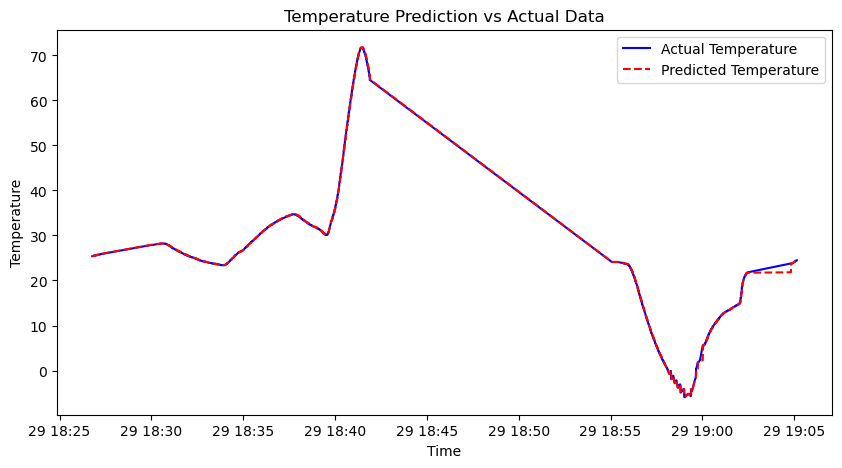

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(y.index, y, label='Actual Temperature', color='blue')
plt.plot(y_pred.index, y_pred, label='Predicted Temperature', color='red', linestyle='--')
plt.title('Temperature Prediction vs Actual Data')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()